In [ ]:
#################################################
# Advanced Machine Learning                     #
# Assignment 1 - Neural Network - IMDB data set #
# Name: Divya Chandrasekaran                    #
# Due Date: 22/02/2024                          #
#################################################

In [1]:
#USING THE IMBD DATASET
#Dataset is divided into train data and test data Data is loaded and 10,000 most frequently occuring words are kept

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
# Check the first label

train_labels[0]

1

In [3]:
# 10000 frequent words are taken into account and  word index should not be exceeded to the frequent word count.
# Finding the max of all the max indexes

max([max(sequence) for sequence in train_data])

9999

**DECODING REVIEWS BACK TO TEXT**

In [4]:
#Loading the mappings from word to integer index and reverse the word index to integer  and then decode the review by mapping integer

# step 1: Load the mappings of the dictionary from the word to integer index

word_index = imdb.get_word_index()

# step 2: reverse word index to integer mapping

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# step 3: Decode the review, mapping integer to words

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


**PREPARING THE DATA**




Our deep convolutional neural network cannot be provided a list of numbers. We'll have to transform them into tensors. To prepare our data, we'll use One-hot Encoding to transform our lists into vectors of 0s and 1s. Each of our sequences would be blown up into 10,000-dimensional vectors with 1 at all positions connecting all numbers in the sequence. This vector will contain the element 0 for all values that are not in integer order. Simply put, each evaluation will be symbolized by a 10,000- dimensional vector. Each index correlates to a particular phrase. Every index with the value 1 indicates a term in the review that is marked by its integer equivalent. Every number that begins with 0 is a name

In [5]:
#Encoding the integer sequences via multi-hot encoding


import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# Vectorizing the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**BUILDING OUR MODEL**

Building the model using 1 Hidden Layer, 64 Hidden unit with tanh activation and mse loss function instead of binary_crossentropy

**MAKING OUR MODELL**

Our initial dataset was made up of vectors that needed to be transformed to encoder labels (0s and 1s). This is one of the most fundamental configurations, and a basic stack of completely linked Dense layers with relu activation works well.



In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**COMPILING OUR MODEL**




We will look at the optimizer, loss function, and data during the compilation phase. The following methods will be used in this case. The binary crossentropy loss function is employed in binary categorization. rmsprop is the algorithm used. Accuracy is used to assess success. Because keras includes all of the rmsprop, binary crossentropy, and accuracy functions, the above methods can be used to build the model



In [9]:
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

**VALIDATING THE APPROACH**


**SETTING ASIDE A VALIDATION SET**


We'll save some of our training data to test the model's accuracy as it advances. A validation set enables businesses to track our model's development through epochs during training on previously unknown data. We can fine-tune the model's training settings using validation stages. To avoid data overfitting and underfitting, use the fit tool.

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**TRAINING YOUR MODEL**


When invoked, the fit method will return a History object. This object has a member history that contains all training process information, including the values of visible or tracked quantities as the epochs advance. This object will be saved so that we can better determine how to fine-tune the training process.

In [11]:
## model planned to train with 20 epoch with batch size of 256
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 5s 60ms/step - loss: 0.1204 - accuracy: 0.8325 - val_loss: 0.0845 - val_accuracy: 0.8848
Epoch 2/20
59/59 [==============================] - 2s 30ms/step - loss: 0.0488 - accuracy: 0.9379 - val_loss: 0.0902 - val_accuracy: 0.8801
Epoch 3/20
59/59 [==============================] - 1s 25ms/step - loss: 0.0303 - accuracy: 0.9648 - val_loss: 0.0993 - val_accuracy: 0.8750
Epoch 4/20
59/59 [==============================] - 1s 25ms/step - loss: 0.0223 - accuracy: 0.9761 - val_loss: 0.1048 - val_accuracy: 0.8742
Epoch 5/20
59/59 [==============================] - 2s 30ms/step - loss: 0.0202 - accuracy: 0.9779 - val_loss: 0.1119 - val_accuracy: 0.8696
Epoch 6/20
59/59 [==============================] - 1s 24ms/step - loss: 0.0211 - accuracy: 0.9756 - val_loss: 0.1144 - val_accuracy: 0.8681
Epoch 7/20
59/59 [==============================] - 2s 29ms/step - loss: 0.0226 - accuracy: 0.9738 - val_loss: 0.1191 - val_accuracy: 0.8633
Epoch 8/20
59

In [12]:
history_dict = history.history
history_dict.keys()

#history_dict consists of
#Training loss
#Training Accuracy
#Validation Loss
#Validation Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**PLOTTING THE TRAINING AND VALIDATION LOSS**

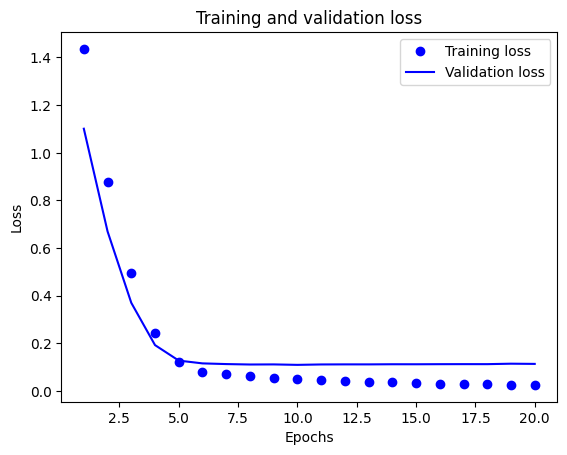

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**PLOTTING THE TRAINING AND VALIDATION ACCURACY**

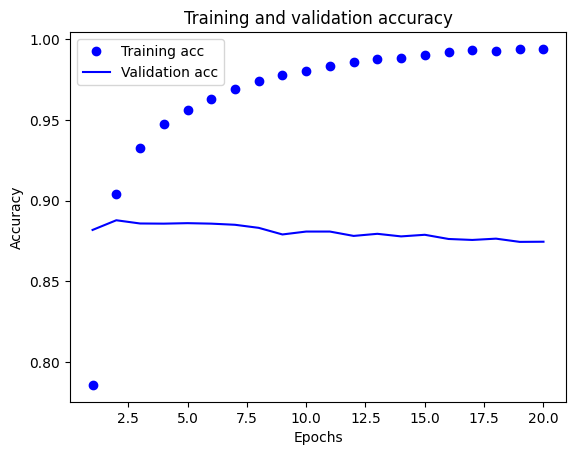

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The graphs above show that the lowest validation loss and optimum validation accuracy occur at 3 to 5 epochs. Then we notice two patterns.

Validation loss rises, while training loss falls.

The certification accuracy falls while the training accuracy rises.

The preceding consequences imply that while the model improves at classifying the training data, it consistently makes worse forecasts when it meets new and unknown data, indicating overfitting. After the fifth epoch, the algorithm starts to match the training data too closely.

To resolve overfitting, the epoch count is decreased to between 3 and 5 epochs. The epochs may differ based on the machine and the character of randomly allocated weights.

In [15]:

results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.1395 - accuracy: 0.8493


In [16]:
results

[0.1394646316766739, 0.8493199944496155]

**COMBINING ALL THE CODE TOGETHER ALONG WITH THE DROPOUT LAYER**

Epoch 1/20
59/59 [==============================] - 5s 70ms/step - loss: 1.4360 - accuracy: 0.7859 - val_loss: 1.1011 - val_accuracy: 0.8819
Epoch 2/20
59/59 [==============================] - 2s 31ms/step - loss: 0.8786 - accuracy: 0.9040 - val_loss: 0.6702 - val_accuracy: 0.8879
Epoch 3/20
59/59 [==============================] - 2s 32ms/step - loss: 0.4949 - accuracy: 0.9325 - val_loss: 0.3703 - val_accuracy: 0.8859
Epoch 4/20
59/59 [==============================] - 2s 29ms/step - loss: 0.2452 - accuracy: 0.9477 - val_loss: 0.1929 - val_accuracy: 0.8858
Epoch 5/20
59/59 [==============================] - 2s 32ms/step - loss: 0.1200 - accuracy: 0.9565 - val_loss: 0.1279 - val_accuracy: 0.8861
Epoch 6/20
59/59 [==============================] - 2s 32ms/step - loss: 0.0819 - accuracy: 0.9633 - val_loss: 0.1162 - val_accuracy: 0.8858
Epoch 7/20
59/59 [==============================] - 2s 40ms/step - loss: 0.0703 - accuracy: 0.9692 - val_loss: 0.1133 - val_accuracy: 0.8851
Epoch 8/20
59

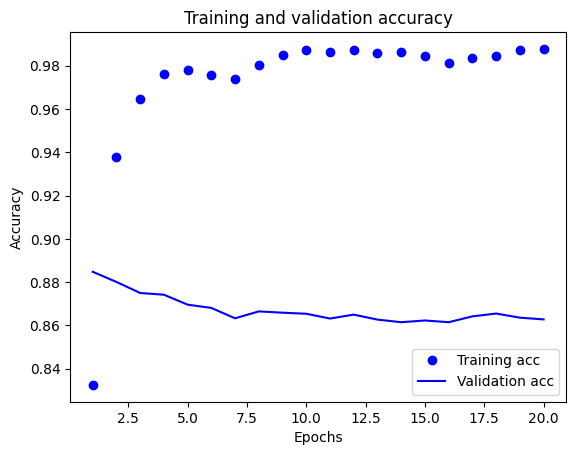

782/782 [==============================] - 3s 4ms/step - loss: 0.1239 - accuracy: 0.8605


[0.12387986481189728, 0.8605200052261353]

In [17]:
# Libraries required for setting up an environment

#####################################
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
#####################################


#RETAINING A MODEL FROM SCRATCH

#Employing the Neural network implementation by using 3 layered approach with a single dropout layer

#######################################
model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
########################################

#Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
########################################
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
########################################


##Here, Let's start by splitting the data
#######################################
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#######################################


#Training a neural network
#####################################################
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
#####################################################


# plotting the Training and Validation accuracy
####################################################
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
####################################################


# Evaluating the results
results = model.evaluate(x_test, y_test)
results
